This is the latest script written after the data has been merged. In here, the merged_data.csv is used.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
import matplotlib
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict


import seaborn as sns # plotting library
from sklearn import svm
import xgboost as xg 

In [2]:
# Import the data

import pandas as pd
Merged_Data=pd.read_csv('Merged_Data.csv')
Merged_Data.head()

visit_id                  type diagnosis        visit_date  age  gender  \
0  B01P0011A  Premalignant lesions     Final  13/02/2015 00:00   72    Male   
1  B01P0014A             Malignant     Final  25/02/2015 00:00   28  Female   
2  B01P0045A             Malignant     Final  06/05/2015 00:00   50  Female   
3  B01P0063A  Premalignant lesions     Final  15/06/2015 00:00   63  Female   
4  B01P0065A  Premalignant lesions     Final  15/06/2015 00:00   59  Female   

   height_cm  weight_kg                         race        bmi  ...  eGFR  \
0     177.80      98.43  Caucasian: Western European  31.136083  ...  89.0   
1     161.29      57.00              Asian: Far East  21.910888  ...   NaN   
2     162.56      79.38  Caucasian: Western European  30.038878  ...  66.5   
3     157.48      66.68                      Unknown  26.887151  ...   NaN   
4     162.56      61.90                      Unknown  23.424119  ...  48.0   

  diptest_done       leu       nit       pro       ph            blo       sg  \
0           No   Unknown   Unknown   Unknown  Unknown        Unknown  Unknown   
1          Yes  Negative  Negative  Negative      6.5  Haemo (trace)    1.015   
2           No   Unknown   Unknown   Unknown  Unknown        Unknown  Unknown   
3          Yes  Negative  Negative     Trace        7       Negative  <=1.005   
4           No   Unknown   Unknown   Unknown  Unknown        Unknown  Unknown   

        ket       glu  
0   Unknown   Unknown  
1  Negative  Negative  
2   Unknown   Unknown  
3  Negative  Negative  
4   Unknown   Unknown  

[5 rows x 123 columns]

In [3]:
#Inspect all the columns in the data.

# iterating the columns
for col in Merged_Data.columns:
    print(col)

visit_id
type
diagnosis
visit_date
age
gender
height_cm
weight_kg
race
bmi
Number_days_to_visit
pain_duration
jaundice_duration
weightLoss_duration
weightLoss_amount
nausea_duration
vomit_duration
diarrhoea_duration
constipation_duration
other_duration_x
PainSiteAbdomenAndBack
PainSiteAbdomenLLQ
PainSiteAbdomenLUQ
PainSiteAbdomenNOS
PainSiteAbdomenCentral
PainSiteAbdomenEpigastric
PainSiteAbdomenLeft
PainSiteAbdomenRight
PainSiteBack
PainSiteChest
PainSiteEpigastricAndBack
PainSiteLowerAbdomenNOS
PainSitePelvic
PainSitePostOp
PainSiteShoulder
PainSiteNA
PainSiteUnknown
JaundiceNo
JaundiceYes
JaundiceUnknown
ConstipationNo
ConstipationYes
ConstipationUnknown
DiarrhoeaNo
DiarrhoeaYes
DiarrhoeaUnknown
NauseaNo
NauseaYes
NauseaUnknown
OtherNo
OtherYes
OtherUnknown
VomitNo
VomitYes
VomitUnknown
WeightLossNo
WeightLossYes
WeightLossUnknown
medical_test_jaundice
medical_test_abdoMass
medical_test_lymphNode
diabetes
diabetes_duration
asthma
asthma_duration
cholesterol
cholesterol_duration
hype

In [5]:
#Drop some of the columns such as diagnosis, date 

Merged_Data.drop(['diagnosis','visit_date'], axis=1,inplace=True)

In [8]:
# Simple Data Explorations
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

In [7]:
initial_eda(Merged_Data)

Dimensions : 263 rows, 121 columns
Total NA Values : 3730 
                           Column Name  Data Type      #Distinct  NA Values
                              visit_id     object          263          0
                                  type     object            3          0
                                   age      int64           58          0
                                gender     object            2          0
                             height_cm    float64           68         79
                             weight_kg    float64          130         76
                                  race     object            8          0
                                   bmi    float64          180         80
                  Number_days_to_visit      int64          263          0
                         pain_duration     object           18          5
                     jaundice_duration     object            9          5
                   weightLoss_duration     object  

In [13]:
#Descriptive statistics 

Features_to_inspect=Merged_Data[['age','height_cm','weight_kg','bmi','Number_days_to_visit','weightLoss_amount','no_of_child','diag_age','Alp','ALT','AST','Alb','Bil','CA 19-9','CEA','CRP','Creat','Hb','INR','K','Na','Plt','T Prot','Urea','WCC','eGFR']]
Features_to_inspect.describe()

age   height_cm   weight_kg         bmi  Number_days_to_visit  \
count  263.000000  184.000000  187.000000  183.000000            263.000000   
mean    61.577947  166.693370   73.683155   26.496402          22642.513308   
std     14.209199    9.746654   16.216245    5.497381           5212.976582   
min     20.000000  143.000000   40.600000   17.254813           7331.000000   
25%     52.000000  159.875000   61.075000   22.749146          19038.000000   
50%     63.000000  167.000000   73.000000   25.499169          23103.000000   
75%     73.500000  173.250000   82.525000   28.855161          27029.000000   
max     87.000000  190.000000  141.000000   46.438132          31950.000000   

       weightLoss_amount  no_of_child         Alp          ALT         AST  \
count         256.000000   251.000000  172.000000   171.000000   27.000000   
mean            1.169961     0.844622  105.794574    48.125731   90.296296   
std             3.984354     1.184804  104.264864   146.080217  150.923265   
min             0.000000     0.000000   10.000000     6.000000   13.000000   
25%             0.000000     0.000000   65.000000    14.000000   27.000000   
50%             0.000000     0.000000   78.000000    21.000000   34.000000   
75%             0.000000     2.000000  104.000000    36.500000   55.500000   
max            32.000000     6.000000  978.000000  1817.000000  746.000000   

       ...       Creat          Hb         INR           K          Na  \
count  ...  178.000000  188.000000  112.000000  184.000000  186.000000   
mean   ...   77.287453  125.438121    1.040179    4.500815  139.595609   
std    ...   41.626156   29.320785    0.216216    1.789156    5.926918   
min    ...   33.000000    8.250000    0.000000    3.100000   71.950000   
25%    ...   60.000000  117.000000    1.000000    4.000000  138.000000   
50%    ...   70.000000  132.000000    1.000000    4.400000  140.000000   
75%    ...   85.000000  143.250000    1.100000    4.700000  142.000000   
max    ...  554.000000  180.000000    2.400000   27.750000  151.000000   

              Plt     T Prot        Urea         WCC        eGFR  
count  185.000000  67.000000  175.000000  188.000000  167.000000  
mean   270.934685  70.568657    6.345714    8.743032   74.817365  
std    111.918848  10.762269   10.867440    4.043324   26.645959  
min     78.000000  11.100000    1.500000    3.240000    0.000000  
25%    206.000000  69.000000    4.000000    6.100000   69.000000  
50%    250.000000  73.000000    4.900000    7.650000   84.000000  
75%    301.000000  76.000000    6.350000   10.325000   90.000000  
max    908.000000  87.000000  111.000000   26.760000  150.000000  

[8 rows x 25 columns]

<AxesSubplot:>

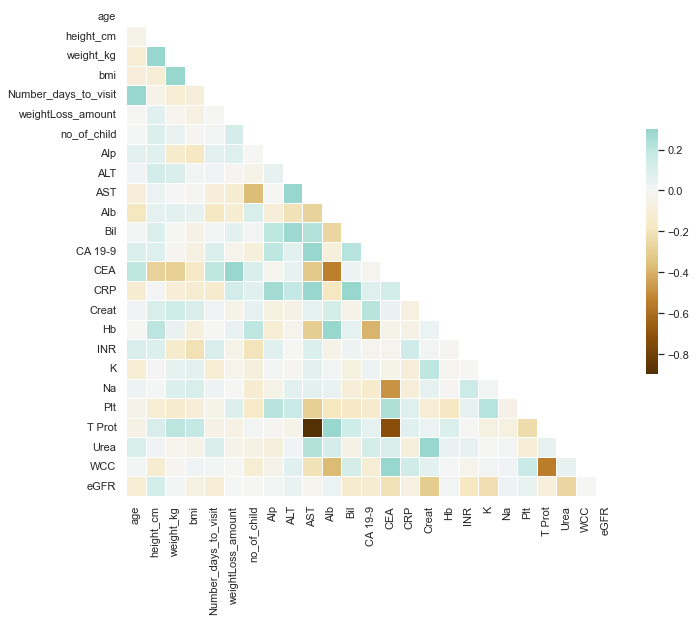

In [14]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = Features_to_inspect.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='BrBG', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

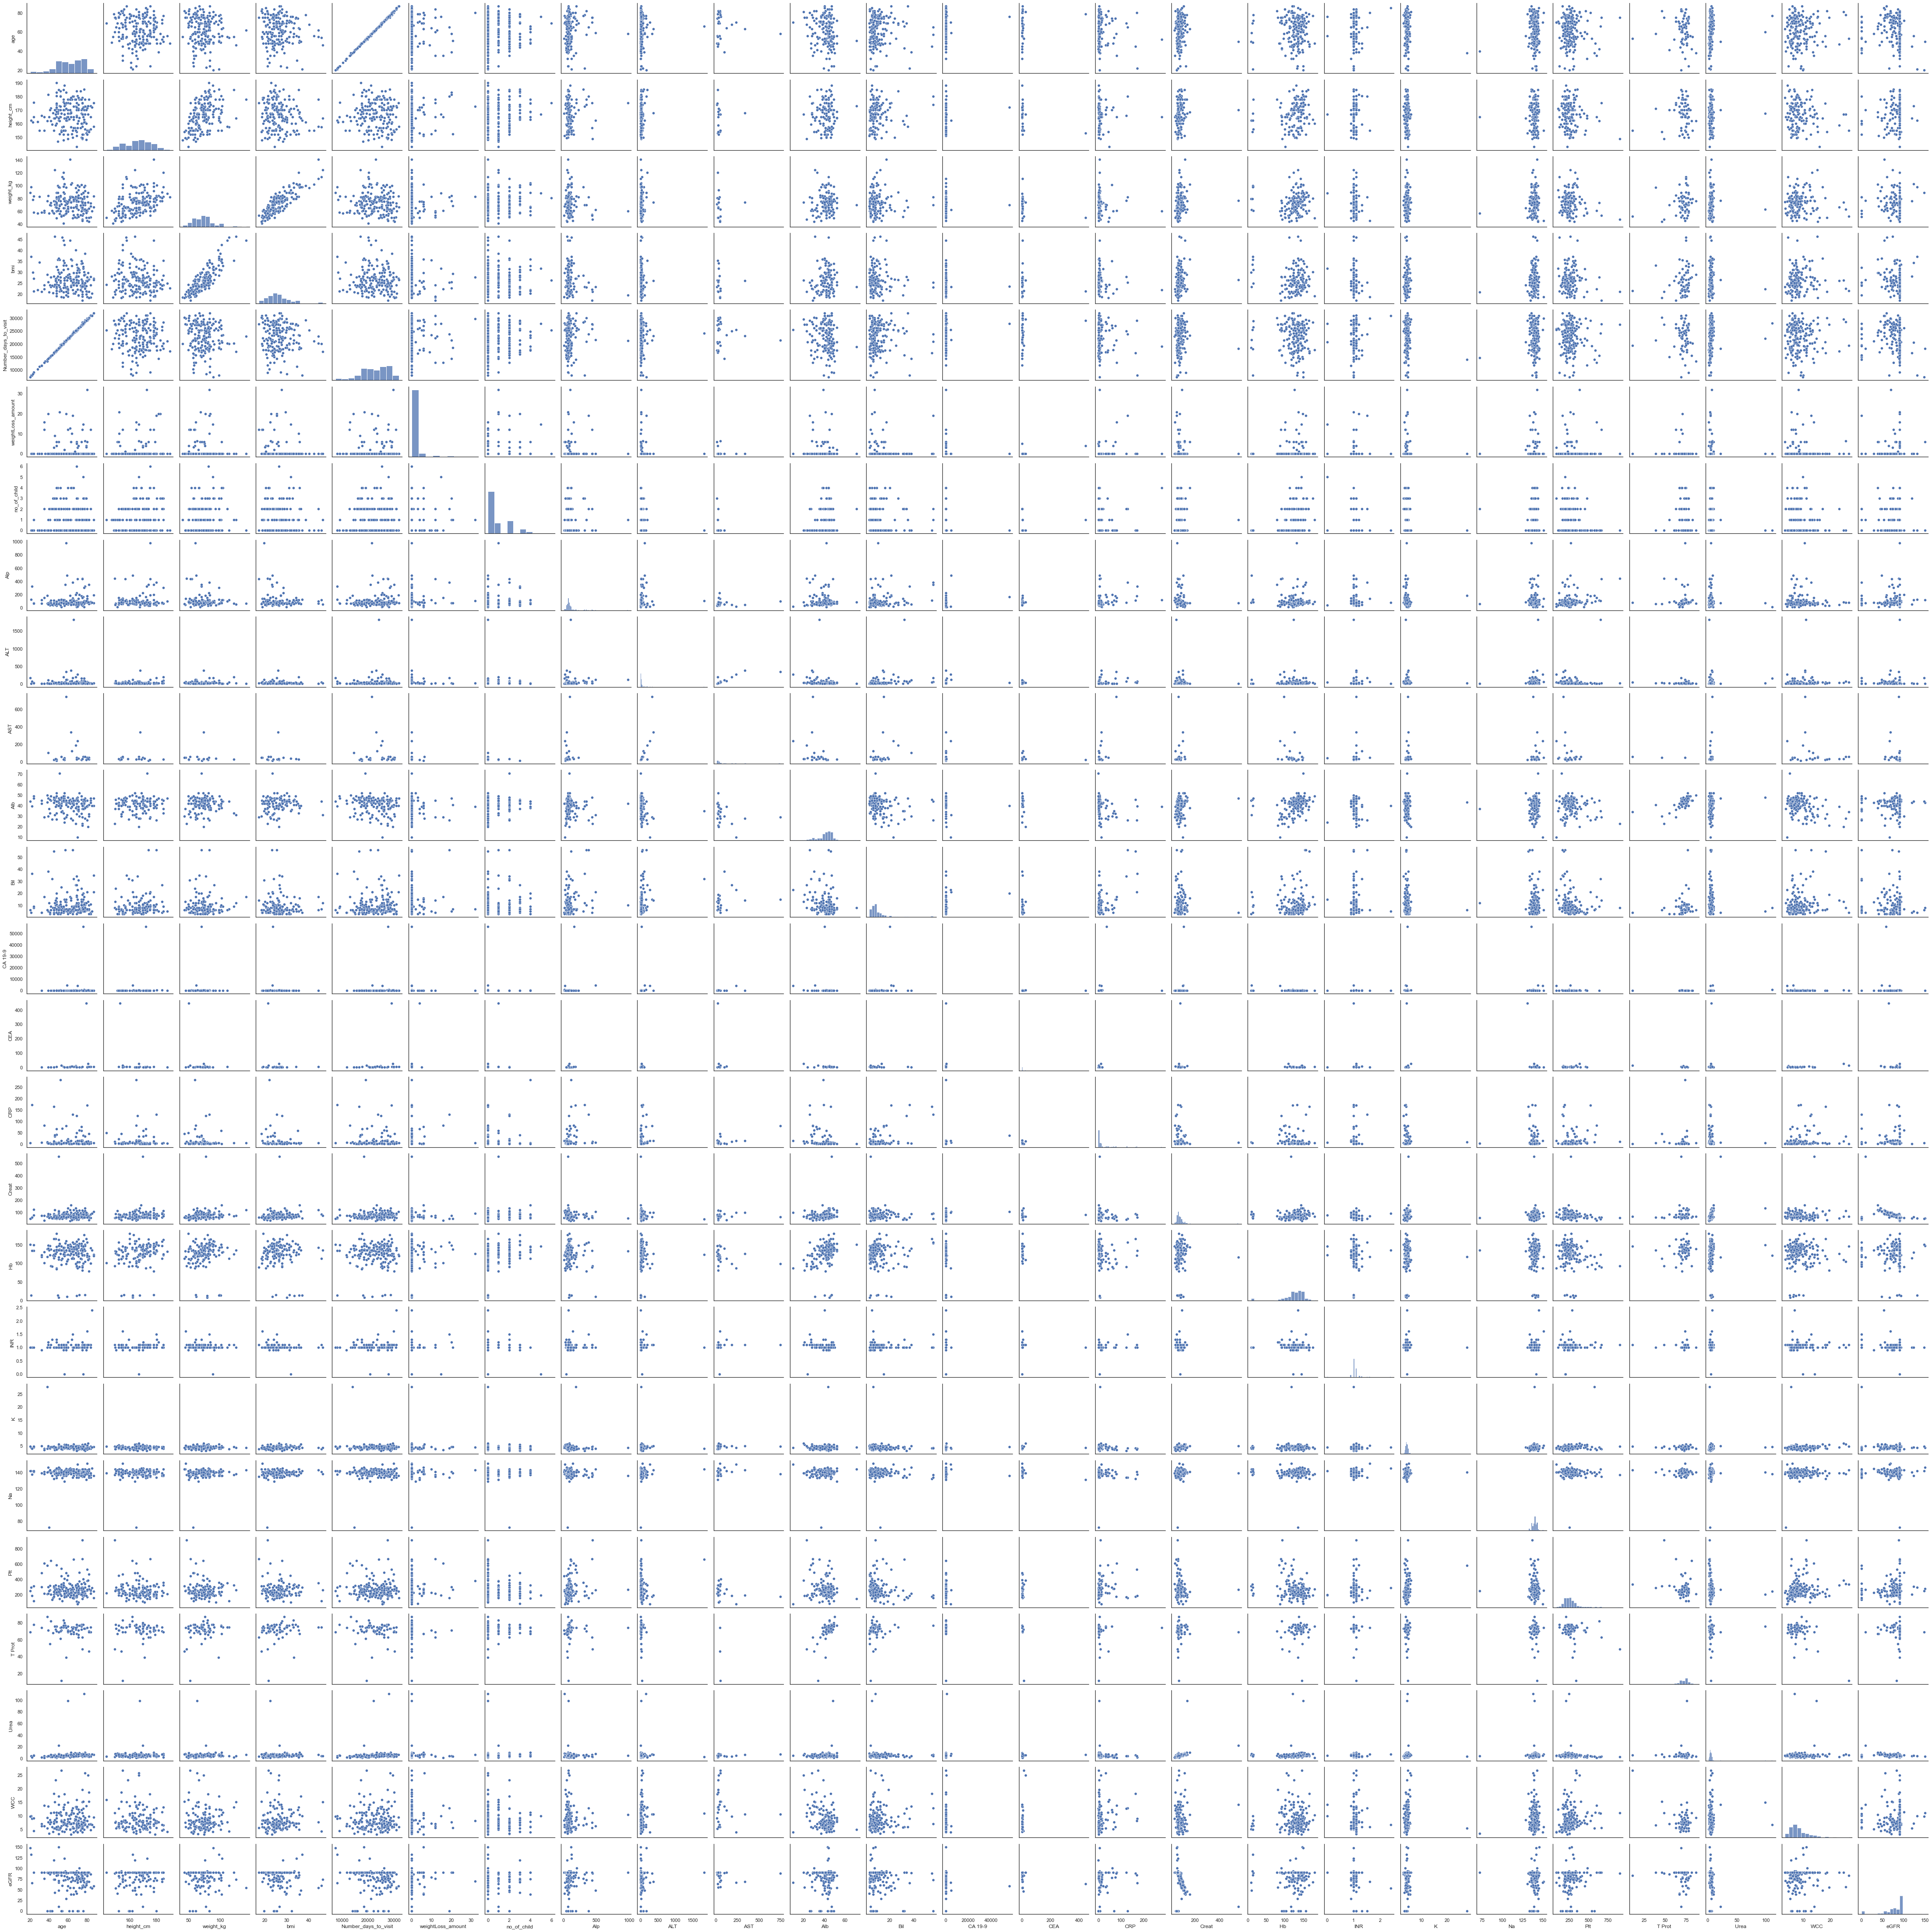

In [15]:
# Basic correlogram
sns.pairplot(Features_to_inspect)
plt.show()

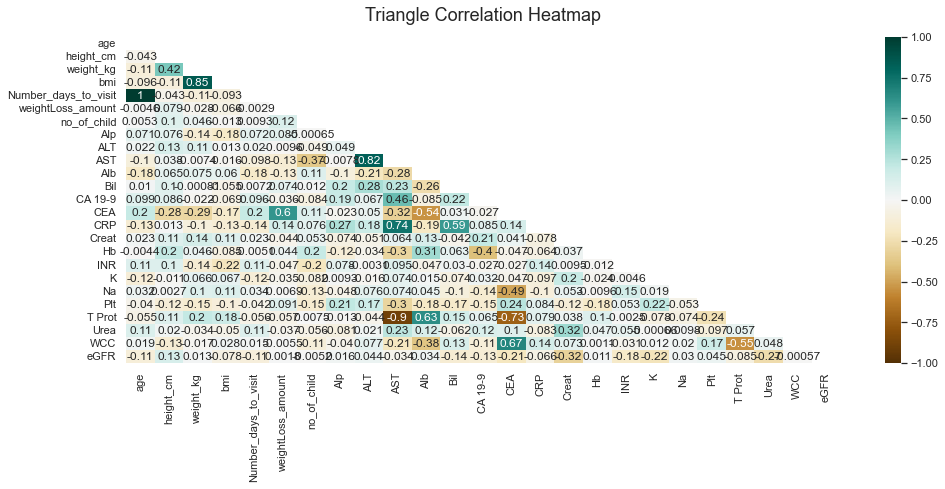

In [16]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(Features_to_inspect.corr(), dtype=np.bool))
heatmap = sns.heatmap(Features_to_inspect.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

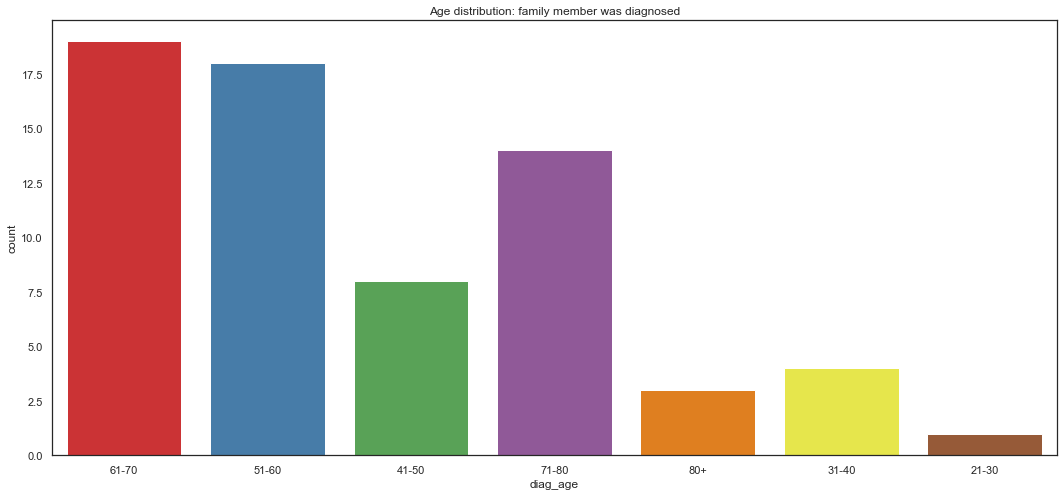

In [18]:
# visualize frequency distribution 
f,ax=plt.subplots(figsize=(18,8))

#f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="diag_age", data=Merged_Data, palette="Set1")
ax.set_title("Age distribution: family member was diagnosed")

plt.show()

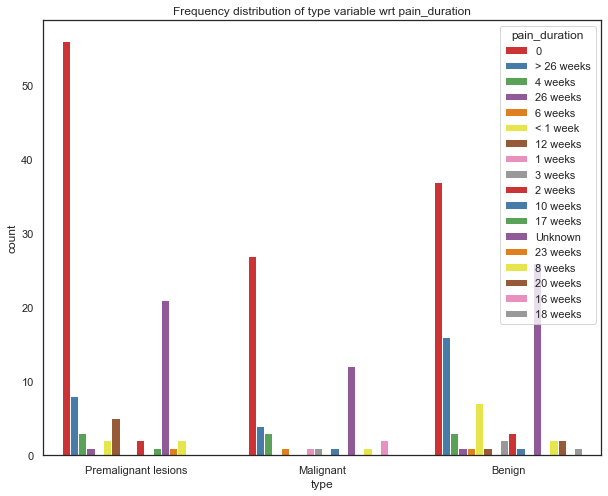

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="type", hue="pain_duration", data=Merged_Data, palette="Set1")
ax.set_title("Frequency distribution of type variable wrt pain_duration")
plt.show()

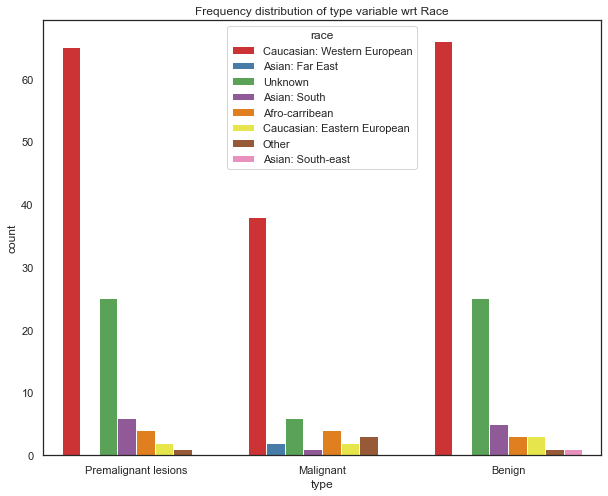

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="type", hue="race", data=Merged_Data, palette="Set1")
ax.set_title("Frequency distribution of type variable wrt Race")
plt.show()

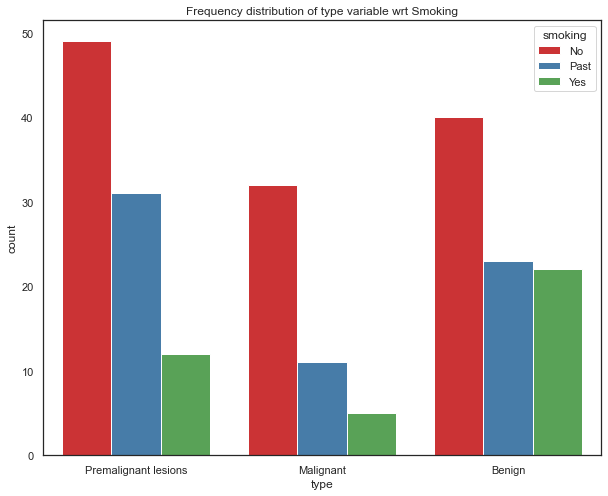

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="type", hue="smoking", data=Merged_Data, palette="Set1")
ax.set_title("Frequency distribution of type variable wrt Smoking")
plt.show()

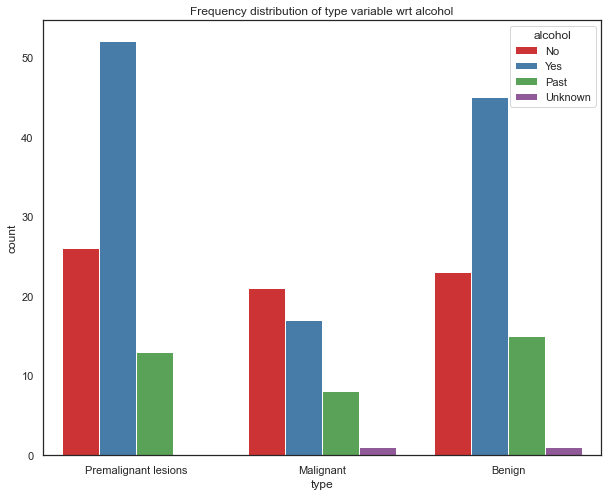

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="type", hue="alcohol", data=Merged_Data, palette="Set1")
ax.set_title("Frequency distribution of type variable wrt alcohol")
plt.show()

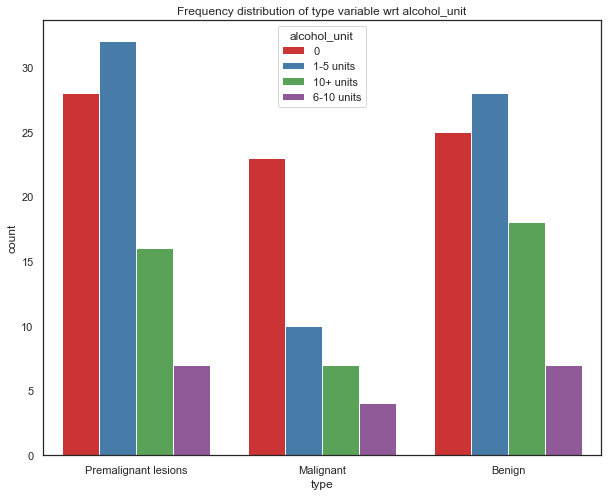

In [26]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="type", hue="alcohol_unit", data=Merged_Data, palette="Set1")
ax.set_title("Frequency distribution of type variable wrt alcohol_unit")
plt.show()

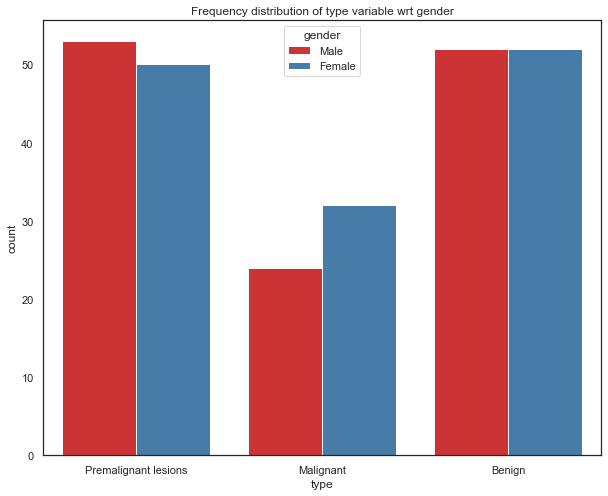

In [27]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="type", hue="gender", data=Merged_Data, palette="Set1")
ax.set_title("Frequency distribution of type variable wrt gender")
plt.show()

In [50]:
Try=Merged_Data.groupby(['type','gender','race']).mean().to_csv('Groupby_race_gender_type_mean.csv')

In [53]:
Try=Merged_Data.groupby(['type','gender','race']).mean()
Try.head()

age   height_cm  weight_kg  \
type   gender race                                                            
Benign Female Afro-carribean               48.000000  171.000000  80.000000   
              Asian: South                 52.333333  162.280000  73.500000   
              Asian: South-east            69.000000  143.000000  49.700000   
              Caucasian: Eastern European  56.000000  170.000000  79.000000   
              Caucasian: Western European  60.545455  160.148182  64.473913   

                                                 bmi  Number_days_to_visit  \
type   gender race                                                           
Benign Female Afro-carribean               27.358845          17880.000000   
              Asian: South                 27.909434          19268.666667   
              Asian: South-east            24.304367          25296.000000   
              Caucasian: Eastern European  27.335640          20679.000000   
              Caucasian: Western European  25.086678          22212.242424   

                                           weightLoss_amount  \
type   gender race                                             
Benign Female Afro-carribean                          0.0000   
              Asian: South                            0.0000   
              Asian: South-east                       0.0000   
              Caucasian: Eastern European             0.0000   
              Caucasian: Western European             2.3925   

                                           PainSiteAbdomenAndBack  \
type   gender race                                                  
Benign Female Afro-carribean                             0.000000   
              Asian: South                               0.333333   
              Asian: South-east                          0.000000   
              Caucasian: Eastern European                0.000000   
              Caucasian: Western European                0.060606   

                                           PainSiteAbdomenLLQ  \
type   gender race                                              
Benign Female Afro-carribean                              0.0   
              Asian: South                                0.0   
              Asian: South-east                           0.0   
              Caucasian: Eastern European                 0.0   
              Caucasian: Western European                 0.0   

                                           PainSiteAbdomenLUQ  \
type   gender race                                              
Benign Female Afro-carribean                              0.0   
              Asian: South                                0.0   
              Asian: South-east                           0.0   
              Caucasian: Eastern European                 0.0   
              Caucasian: Western European                 0.0   

                                           PainSiteAbdomenNOS  ...      Creat  \
type   gender race                                             ...              
Benign Female Afro-carribean                         0.000000  ...        NaN   
              Asian: South                           0.000000  ...  61.000000   
              Asian: South-east                      0.000000  ...        NaN   
              Caucasian: Eastern European            0.000000  ...        NaN   
              Caucasian: Western European            0.151515  ...  65.095238   

                                                   Hb       INR         K  \
type   gender race                                                          
Benign Female Afro-carribean                      NaN       NaN       NaN   
              Asian: South                 107.000000  1.000000  4.550000   
              Asian: South-east            101.000000       NaN  4.800000   
              Caucasian: Eastern European  142.000000       NaN  5.500000   
              Caucasian: Western European  124.807692  1.061538  4.213636

An imputation was done using the Groupby_race_gender_type_mean.csv.

In the file, mean of the different groups were imputed. For instance, if Type = benign, gender = Female, race= Afro-carribean and height_cm is missing.

The missing height_cm will be replaced by 171, weight_kg if missing will be imputed as 80. Same process was applied to other classes.

Note. This imputation was just applicable to height, weight and bmi. We do not impute the biomarkers at any point.

In [4]:
#Import the recent Merged_Data_V1 which has the imputed values for height, weight and bmi
Merged_Data_V1=pd.read_csv('Merged_Data_V1.csv')

In [5]:
Merged_Data_V1.head()

visit_id                  type  age  gender  height_cm  weight_kg  \
0  B01P0011A  Premalignant lesions   72    Male     177.80      98.43   
1  B01P0014A             Malignant   28  Female     161.29      57.00   
2  B01P0045A             Malignant   50  Female     162.56      79.38   
3  B01P0063A  Premalignant lesions   63  Female     157.48      66.68   
4  B01P0065A  Premalignant lesions   59  Female     162.56      61.90   

                          race        bmi  Number_days_to_visit pain_duration  \
0  Caucasian: Western European  31.136083                 26512             0   
1              Asian: Far East  21.910888                 10348    > 26 weeks   
2  Caucasian: Western European  30.038878                 18590             0   
3                      Unknown  26.887151                 23093             0   
4                      Unknown  23.424119                 21702       4 weeks   

   ...  eGFR diptest_done       leu       nit       pro       ph  \
0  ...  89.0           No   Unknown   Unknown   Unknown  Unknown   
1  ...   NaN          Yes  Negative  Negative  Negative      6.5   
2  ...  66.5           No   Unknown   Unknown   Unknown  Unknown   
3  ...   NaN          Yes  Negative  Negative     Trace        7   
4  ...  48.0           No   Unknown   Unknown   Unknown  Unknown   

             blo       sg       ket       glu  
0        Unknown  Unknown   Unknown   Unknown  
1  Haemo (trace)    1.015  Negative  Negative  
2        Unknown  Unknown   Unknown   Unknown  
3       Negative  <=1.005  Negative  Negative  
4        Unknown  Unknown   Unknown   Unknown  

[5 rows x 120 columns]

<AxesSubplot:xlabel='type', ylabel='count'>

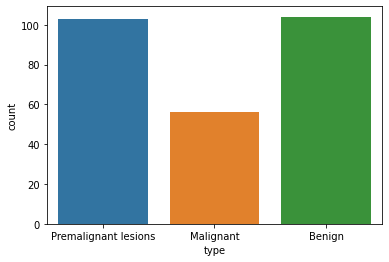

In [6]:
sns.countplot(x ='type', data = Merged_Data_V1)

In [9]:
initial_eda(Merged_Data_V1)

Dimensions : 263 rows, 120 columns
Total NA Values : 3441 
                           Column Name  Data Type      #Distinct  NA Values
                              visit_id     object          263          0
                                  type     object            3          0
                                   age      int64           58          0
                                gender     object            2          0
                             height_cm    float64           74          0
                             weight_kg    float64          137          0
                                  race     object            8          0
                                   bmi    float64          194          0
                  Number_days_to_visit      int64          263          0
                         pain_duration     object           18          5
                     jaundice_duration     object            9          5
                   weightLoss_duration     object  

In [10]:
#Imputations, use mean for the numeric features and mode for categorical features
v=Merged_Data_V1.select_dtypes(exclude=['object']).columns
t=~Merged_Data_V1.columns.isin(v)
Merged_Data_V1.loc[:,v]=Merged_Data_V1.loc[:,v].fillna(Merged_Data_V1.loc[:,v].mean().to_dict())

Merged_Data_V1.loc[:,t]=Merged_Data_V1.loc[:,t].fillna(Merged_Data_V1.loc[:,t].mode().iloc[0].to_dict())

In [11]:
initial_eda(Merged_Data_V1)

Dimensions : 263 rows, 120 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                              visit_id     object          263          0
                                  type     object            3          0
                                   age      int64           58          0
                                gender     object            2          0
                             height_cm    float64           74          0
                             weight_kg    float64          137          0
                                  race     object            8          0
                                   bmi    float64          194          0
                  Number_days_to_visit      int64          263          0
                         pain_duration     object           18          0
                     jaundice_duration     object            9          0
                   weightLoss_duration     object     

In [12]:
Merged_Data_V1.to_csv('Merged_Data_V2.csv')

In [13]:
# Reassign target
Merged_Data_V2=Merged_Data_V1

#label encode the target 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Merged_Data_V2['type']=le.fit_transform(Merged_Data_V2["type"])

Merged_Data_V2.head()

visit_id  type  age  gender  height_cm  weight_kg  \
0  B01P0011A     2   72    Male     177.80      98.43   
1  B01P0014A     1   28  Female     161.29      57.00   
2  B01P0045A     1   50  Female     162.56      79.38   
3  B01P0063A     2   63  Female     157.48      66.68   
4  B01P0065A     2   59  Female     162.56      61.90   

                          race        bmi  Number_days_to_visit pain_duration  \
0  Caucasian: Western European  31.136083                 26512             0   
1              Asian: Far East  21.910888                 10348    > 26 weeks   
2  Caucasian: Western European  30.038878                 18590             0   
3                      Unknown  26.887151                 23093             0   
4                      Unknown  23.424119                 21702       4 weeks   

   ...       eGFR diptest_done       leu       nit       pro       ph  \
0  ...  89.000000           No   Unknown   Unknown   Unknown  Unknown   
1  ...  74.817365          Yes  Negative  Negative  Negative      6.5   
2  ...  66.500000           No   Unknown   Unknown   Unknown  Unknown   
3  ...  74.817365          Yes  Negative  Negative     Trace        7   
4  ...  48.000000           No   Unknown   Unknown   Unknown  Unknown   

             blo       sg       ket       glu  
0        Unknown  Unknown   Unknown   Unknown  
1  Haemo (trace)    1.015  Negative  Negative  
2        Unknown  Unknown   Unknown   Unknown  
3       Negative  <=1.005  Negative  Negative  
4        Unknown  Unknown   Unknown   Unknown  

[5 rows x 120 columns]

In [14]:
Merged_Data_V2.describe()

type         age   height_cm   weight_kg         bmi  \
count  263.000000  263.000000  263.000000  263.000000  263.000000   
mean     0.996198   61.577947  166.623954   74.383422   26.676964   
std      0.888854   14.209199    8.874378   14.395246    4.892674   
min      0.000000   20.000000  143.000000   40.600000   17.254813   
25%      0.000000   52.000000  160.570000   64.470000   23.851620   
50%      1.000000   63.000000  165.100000   75.000000   26.000000   
75%      2.000000   73.500000  174.000000   82.000000   28.244905   
max      2.000000   87.000000  190.000000  141.000000   46.438132   

       Number_days_to_visit  weightLoss_amount  PainSiteAbdomenAndBack  \
count            263.000000         263.000000              263.000000   
mean           22642.513308           1.169961                0.041825   
std             5212.976582           3.930768                0.200571   
min             7331.000000           0.000000                0.000000   
25%            19038.000000           0.000000                0.000000   
50%            23103.000000           0.000000                0.000000   
75%            27029.000000           0.000000                0.000000   
max            31950.000000          32.000000                1.000000   

       PainSiteAbdomenLLQ  PainSiteAbdomenLUQ  ...       Creat          Hb  \
count          263.000000          263.000000  ...  263.000000  263.000000   
mean             0.003802            0.003802  ...   77.287453  125.438121   
std              0.061663            0.061663  ...   34.213878   24.771126   
min              0.000000            0.000000  ...   33.000000    8.250000   
25%              0.000000            0.000000  ...   64.500000  122.500000   
50%              0.000000            0.000000  ...   77.287453  125.438121   
75%              0.000000            0.000000  ...   78.000000  137.500000   
max              1.000000            1.000000  ...  554.000000  180.000000   

              INR           K          Na         Plt      T Prot        Urea  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean     1.040179    4.500815  139.595609  270.934685   70.568657    6.345714   
std      0.140734    1.495282    4.980399   93.791072    5.401634    8.856278   
min      0.000000    3.100000   71.950000   78.000000   11.100000    1.500000   
25%      1.000000    4.200000  139.000000  222.500000   70.568657    4.350000   
50%      1.040179    4.500815  139.595609  270.934685   70.568657    6.345714   
75%      1.040179    4.500815  141.000000  276.000000   70.568657    6.345714   
max      2.400000   27.750000  151.000000  908.000000   87.000000  111.000000   

              WCC        eGFR  
count  263.000000  263.000000  
mean     8.743032   74.817365  
std      3.415928   21.209711  
min      3.240000    0.000000  
25%      6.900000   74.817365  
50%      8.743032   74.817365  
75%      8.850000   90.000000  
max     26.760000  150.000000  

[8 rows x 64 columns]

In [15]:
# 3 datasets
B = Merged_Data_V2[(Merged_Data_V2['type'] == 0)]
M = Merged_Data_V2[(Merged_Data_V2['type'] == 1)]
P=Merged_Data_V2[(Merged_Data_V2['type'] == 2)]

In [16]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore') #ignore warning messages 

In [17]:
#------------COUNT-----------------------
trace = go.Bar(x = (len(M), len(P),len(B)), y = ['malignant', 'premalignant','benign'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie( values = Merged_Data_V2['type'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue', 'gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [18]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = B[data_select]
    tmp2 = M[data_select]
    tmp3=P[data_select]
    hist_data = [tmp1, tmp2,tmp3]
    
    group_labels = ['benign','malignant','premalignant']
    colors = ['gold', 'lightskyblue','blue']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')


In [19]:
#plot distribution 'mean'
plot_distribution('age', .5)
plot_distribution('height_cm', .5)
plot_distribution('weight_kg', 5)
plot_distribution('bmi', 10)
#plot_distribution('ALT', .5)
#plot_distribution('AST', .5)
#plot_distribution('Alb', .5)
#plot_distribution('CA 19-9', .5)
#plot_distribution('CEA', .5)
#plot_distribution('CRP', .5)

In [20]:
#correlation
correlation = Merged_Data_V2.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [21]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

In [22]:
#Let's check the correlation between few features by pair

def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = M[feat1],
        y = M[feat2],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = B[feat1],
        y = B[feat2],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))
    
    trace2 = go.Scatter(
        x = P[feat1],
        y = P[feat2],
        name = 'premalignant',
        mode = 'markers',
        marker = dict(color = 'blue',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1, trace2]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)


In [23]:
plot_feat1_feat2('type','CA 19-9')
plot_feat1_feat2('Na','Plt')
plot_feat1_feat2('CEA','K')
plot_feat1_feat2('Urea','Bil')

In [24]:
# checking features
cat = Merged_Data_V2.select_dtypes(include='O').keys()
# display variabels
cat

Index(['visit_id', 'gender', 'race', 'pain_duration', 'jaundice_duration',
       'weightLoss_duration', 'nausea_duration', 'vomit_duration',
       'diarrhoea_duration', 'constipation_duration', 'other_duration_x',
       'medical_test_jaundice', 'medical_test_abdoMass',
       'medical_test_lymphNode', 'diabetes', 'diabetes_duration', 'asthma',
       'asthma_duration', 'cholesterol', 'cholesterol_duration',
       'hypertension', 'hypertension_duration', 'heart', 'heart_duration',
       'kidney', 'kidney_duration', 'lung', 'lung_duration', 'liver',
       'liver_duration', 'stroke', 'stroke_duration', 'other',
       'other_duration_y', 'Unknown', 'smoking', 'smoking_duration', 'alcohol',
       'alcohol_duration', 'alcohol_unit', 'drugs', 'drugs_duration', 'spouse',
       'relation', 'relation_subtype', 'cancer', 'diag_age', 'diptest_done',
       'leu', 'nit', 'pro', 'ph', 'blo', 'sg', 'ket', 'glu'],
      dtype='object')

In [25]:
Merged_Data_V2.drop('visit_id', axis=1,inplace=True)

In [26]:
df=pd.get_dummies(Merged_Data_V2)

In [27]:
df.head(50)

type  age  height_cm  weight_kg        bmi  Number_days_to_visit  \
0      2   72     177.80      98.43  31.136083                 26512   
1      1   28     161.29      57.00  21.910888                 10348   
2      1   50     162.56      79.38  30.038878                 18590   
3      2   63     157.48      66.68  26.887151                 23093   
4      2   59     162.56      61.90  23.424119                 21702   
5      2   69     154.00      79.38  33.471074                 25533   
6      2   80     172.72      82.55  27.671444                 29694   
7      0   49     167.64     100.33  35.700599                 18012   
8      1   78     156.00      61.00  25.065746                 28811   
9      0   75     179.07      61.00  19.023226                 28326   
10     0   84     165.10      50.80  18.636724                 30844   
11     1   21     162.56      98.00  37.085035                  7989   
12     1   50     165.00      64.40  21.000000                 18349   
13     2   45     164.00      76.00  28.256990                 16564   
14     1   87     175.26      83.50  27.184469                 31827   
15     1   65     155.00      60.00  24.973985                 23769   
16     1   48     165.10      89.00  32.650953                 17790   
17     2   80     171.50      62.20  21.147651                 29323   
18     0   76     166.80      88.40  31.773143                 27908   
19     2   73     178.00      69.00  21.777553                 26964   
20     0   51     173.00      70.00  23.388687                 18974   
21     2   76     152.00      56.20  24.324792                 27818   
22     2   64     177.80     104.14  32.942311                 23510   
23     0   69     175.26      81.00  26.370563                 25272   
24     1   38     162.00      75.80  28.882792                 13294   
25     0   42     171.50      69.00  23.459613                 15536   
26     0   68     165.10      75.80  21.270000                 24880   
27     2   60     175.26      66.85  21.763854                 22491   
28     0   48     180.34      69.85  21.477428                 17637   
29     1   63     165.10      65.60  24.066320                 23335   
30     2   52     172.72      82.55  27.671444                 19810   
31     2   56     188.00      88.00  24.898144                 21119   
32     0   48     171.00      80.00  27.358845                 17880   
33     2   75     175.00      75.00  24.489796                 27528   
34     2   68     154.94      96.52  40.205939                 25254   
35     0   48     172.00      60.00  20.281233                 17803   
36     0   56     154.94     102.00  42.488663                 21061   
37     0   62     175.00      83.00  27.102041                 22865   
38     0   60     177.80      60.00  18.979630                 22246   
39     0   57     154.94      55.50  23.118832                 21065   
40     1   51     165.00      97.50  35.812672                 18833   
41     1   48     190.00      82.00  22.714681                 17244   
42     2   62     178.00     141.00  44.501957                 22930   
43     0   64     152.40      82.55  35.542432                 23448   
44     1   69     170.00      82.00  28.373702                 25600   
45     0   53     167.64      53.00  18.859083                 19361   
46     0   69     143.00      49.70  24.304367                 25296   
47     0   35     154.94      58.10  24.201876                 12802   
48     2   67     177.80      79.40  25.116377                 24701   
49     0   75     149.00      47.00  21.170218                 27494   

    weightLoss_amount  PainSiteAbdomenAndBack  PainSiteAbdomenLLQ  \
0                 0.0                       0                   0   
1                 0.0                       0                   0   
2                 0.0                       0                   0   
3                 0.0                       0          

In [31]:
df.height_cm.mean()

166.62395437262356

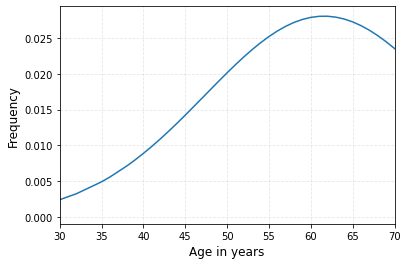

In [28]:
# Calculating mean and Stdev of AGW
df_mean = df['age'].mean()
df_std = df['age'].std()
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["age"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["age"].sort_values(), pdf)
plt.xlim([30,70])  
plt.xlabel("Age in years", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

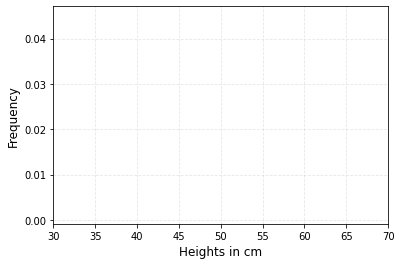

In [34]:
df_mean = df.height_cm.mean()
df_std = df.height_cm.std()
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["height_cm"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["height_cm"].sort_values(), pdf)
plt.xlim([30,70])  
plt.xlabel("Heights in cm", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [120]:
df.to_csv('Merged_Data_V4.csv') #this was shared so aditya can fit GAIN on

In [35]:
target_pca = df['type']
data_pca = df.drop('type', axis=1)

target_pca = pd.DataFrame(target_pca)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['type'] = pca_std['type'].replace({1:'premalignant',0:'benign',2:'Malignant'})

In [36]:
#explained_variance 
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
var_pca = var_pca.T

#----------SUM AND DROP COMP [7:30]
col_list = list(v for v in chain(pca_std.columns[6:30])) 
var_pca['OTHERS_COMP'] = var_pca[col_list].sum(axis=1)
var_pca.drop(var_pca[col_list],axis=1,inplace=True)
var_pca = var_pca.T

In [37]:
labels = ['COMP1','COMP2','COMP3','COMP4','COMP5','COMP6', 'COMP7 - 30']
colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white']

trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'PCA : components and explained variance (6 comp = 88.8%)')
 
                   
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [38]:
#PCA scatter plot with 2 components (52.7%)
pca = PCA(n_components = 2)

pca_std = pca.fit(X_std, target_pca).transform(X_std)
pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2'])
pca_std = pca_std.merge(target_pca,left_index = True,right_index = True,how = 'left')
pca_std['type'] = pca_std['type'].replace({1:'premalignant',0:'benign',2:'Malignant'})

In [39]:
def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_std[pca_std['type'] == target]['COMP1'] ,
                        y = pca_std[pca_std['type'] == target]['COMP2'],
                        name = target, mode = 'markers',
                        marker = dict(color = color,line = dict(width = 1))
                       )
    return tracer
layout = go.Layout(dict(title = 'PCA Scatter plot (2 comp = 52.7%)',
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP1 = 34.3%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP2 = 18.4%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 800
                       ))
trace1 = pca_scatter('malignant','#FFD700')
trace2 = pca_scatter('premalignant','#7EC0EE')
trace0=pca_scatter('benign','blue')
plots = [trace2,trace1,trace0]
fig = go.Figure(data = plots,layout = layout)
py.iplot(fig)

In [40]:
y=target_pca
X=data_pca 

In [41]:
#ML Model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# check the shape of X_train and X_test

X_train.shape, X_test.shape

((184, 519), (79, 519))

In [42]:
#To make a PCA, normalize data is essential
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [44]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.5823


In [45]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.5823


In [46]:
#Find important features with Random Forest model 

#Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

#First, I will create the Random Forest model as follows:-
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
#import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #RandomForestRegressor
from sklearn.feature_selection import SelectFromModel


def rf_importance(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,random_state=0):
    
    model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability. 
    print("Feature ranking:") 
#    l1,l2,l3,l4 = [],[],[],[]
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
    #feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])
    
    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show() 
    
    return model

def rf_importance_entropy(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,random_state=0,criterion='entropy'):
    
    model = RandomForestClassifier(criterion='entropy',n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability. 
    print("Feature ranking:") 
#    l1,l2,l3,l4 = [],[],[],[]
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
    #feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])
    
    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show() 
    
    return model

def rf_importance_logloss(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,random_state=0,criterion='log_loss'):
    
    model = RandomForestClassifier(criterion='log_loss',n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability. 
    print("Feature ranking:") 
#    l1,l2,l3,l4 = [],[],[],[]
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
    #feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])
    
    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show() 
    
    return model


def gbt_importance(X_train,y_train,max_depth=10,top_n=15,n_estimators=50,random_state=0):
    
    model = GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                       random_state=random_state)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree[0].feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability. 
    print("Feature ranking:")   
#    l1,l2,l3,l4 = [],[],[],[]
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
#    feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])   
    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show() 
    
    return model

In [48]:
rf_importance(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,rI andom_state=0)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [49]:
# Compare Algorithms
#Zero Inputation 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('Multinomial', LogisticRegression(multi_class='multinomial', solver='lbfgs'))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('AdaBoost', AdaBoostClassifier())) 
models.append(('SVM_rbf', SVC(kernel='rbf'))) 
models.append(('SVM_sigmoid', SVC(kernel='sigmoid'))) 
models.append(('GNB', GaussianNB()))
models.append(('SDG', SGDClassifier()))
models.append(('DT', DecisionTreeClassifier()))


# evaluate each model in turn

results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))

ValueError: multiclass format is not supported